In [1]:
import numpy as np
import xarray as xr
from pathlib import Path
import os
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
from matplotlib.pyplot import get_cmap
import regionmask

In [2]:
fig_dir = '/home/548/cd3022/figures/aus-solar-resource'
os.makedirs(fig_dir, exist_ok=True)

In [5]:
rez_file = '/g/data/er8/users/cd3022/data/boundary_files/Indicative REZ boundaries 2024 GIS data.kml'
rez = gpd.read_file(rez_file, engine='pyogrio')
rez = rez.to_crs(epsg=4326)
rez['Name'] = rez['Name'].str[:2]

my_zones = ['Q2', 'Q8', 'N3', 'N5', 'V4', 'V2', 'T1', 'T3', 'S7', 'S8']
my_rez = rez[rez['Name'].isin(my_zones)]

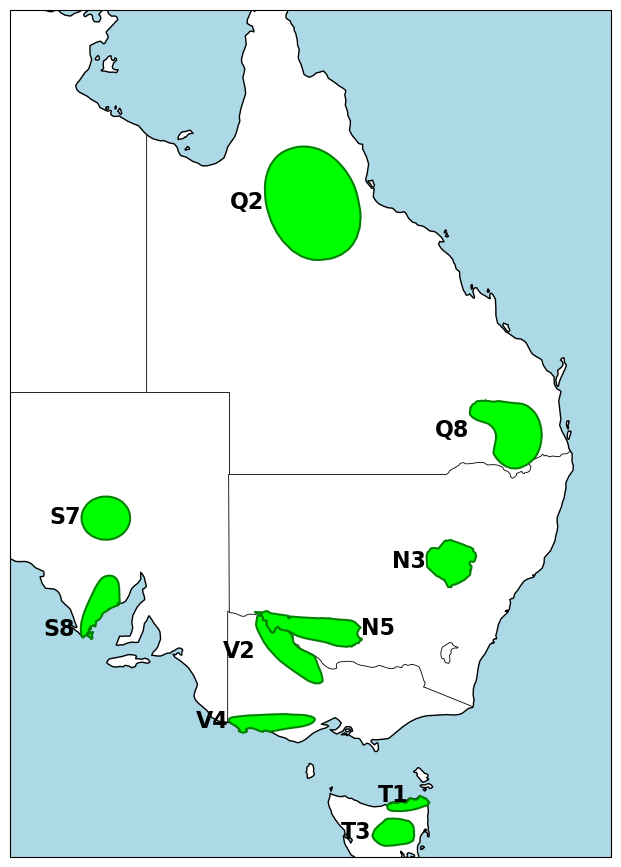

In [44]:
fig, ax = plt.subplots(
    figsize=(8, 11),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

# Set extent to Australia
ax.set_extent([133, 155, -43, -12], crs=ccrs.PlateCarree())

# Add base features
ax.add_feature(cfeature.LAND, facecolor="white")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")
ax.coastlines(resolution="50m", linewidth=1.0)
ax.add_feature(cfeature.BORDERS, linewidth=0.7)

# Add state borders (admin_1 = first-level divisions, e.g. states)
states = cfeature.NaturalEarthFeature(
    category="cultural",
    name="admin_1_states_provinces_lines",
    scale="50m",
    facecolor="none"
)
ax.add_feature(states, edgecolor="black", linewidth=0.6)

# Add your REZ geometries with labels
for idx, geometry in enumerate(my_rez.geometry):
    ax.add_geometries(
        [geometry],
        crs=ccrs.PlateCarree(),
        facecolor="lime",
        edgecolor="green",
        linewidth=1.5,
    )

    # Add label
    minx, miny, maxx, maxy = geometry.bounds
    centroid = geometry.centroid
    if my_rez['Name'].iloc[idx] == 'N5':
        x = maxx
        y = centroid.y
        ha = 'left'
    elif my_rez['Name'].iloc[idx] == 'T1':
        x = centroid.x
        y = maxy
        ha = 'right'
    else:
        x = minx
        y = centroid.y
        ha = 'right'
    if my_rez['Name'].iloc[idx] == 'S8':
        x -= 0.2
        y -= 1
    ax.text(
        x, y,
        my_rez["Name"].iloc[idx],
        transform=ccrs.PlateCarree(),
        fontsize=16, fontweight="bold",
        ha=ha, va="center",
        color="black",
    )
plt.savefig(fig_dir+"/rez_map.png")
plt.show()